In [3]:
import numpy as np  #to manipulate array dataframes(comes from tables)
import pandas as pd  #to manipulate dataframes

import seaborn as sns  #for data visualization (provides a variety of visualization patterns as scaterplot and lineplot)
import matplotlib.pyplot as plt #for data visualization (Visualization using Matplotlib generally consists of bars,pies,lines,scatter plots) 
import os  #module for interacting with the native OS Python which is currently running on.

from sklearn.utils import shuffle               #to shuffle the data to remove any inherent ordering in the dataset
                                                # which can lead to bias in the learning process 
from sklearn.tree import DecisionTreeRegressor  #importation od decision tree module 
from sklearn.svm import SVR                     #importation of SVR module 
from sklearn.ensemble import RandomForestRegressor  #importattion of randomforest regressor module
from sklearn.linear_model import LinearRegression, Ridge, Lasso  #importation of linear regression module 

from sklearn.model_selection import train_test_split #to devide dataframe into testing and training 

from sklearn.preprocessing import StandardScaler   #for the normalisation of data 
from sklearn.preprocessing import LabelEncoder     #to convert categorical data into numerical

from sklearn.metrics import r2_score   #coefficient of determination (regression score function)
from sklearn.metrics import mean_squared_error  #error calculation module 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score  #model to evaluate the model Model-evaluation tools
from sklearn.metrics import classification_report, confusion_matrix  #to test the performance of the machine learning model
from sklearn.model_selection import GridSearchCV,ShuffleSplit    #to determine the best model with the best parameters (model evaluation tool) 

from sklearn import linear_model  #module it contain different functions for performing machine learning with linear models. 
                                  #The term linear model implies that the model is specified as a linear combination of features


%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PATH = '/content/drive/MyDrive/pfe seekmake/'

os.chdir(PATH)

##**Data importation**

In [5]:
#importaion of the exel file 
df = pd.read_excel('output_data.xlsx')
#convert the dataframe to a CSV file
df.to_csv('output_data.csv', index=False)

In [6]:
# Extracting the model input and output features
X = df.drop(["name","Finish","technolgy","material","color","Process"], axis=1)  # Removing species columns from the input features
y = df['price (in $ )']  # Single output 

##80% for training and 20% for validation

In [7]:
#split the data into training and testing sets  train_size = int(0.8 * len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 )


###Shuffling the data is an important step in many machine learning tasks. The main reason for shuffling the data is to remove any inherent ordering in the dataset, which can lead to bias in the learning process.

For example, imagine a dataset where the samples are ordered by the value of the target variable. If we do not shuffle the data before splitting it into training and testing sets, we may end up with a training set that contains only low or high values of the target variable, while the testing set contains the opposite. This can lead to poor performance on the testing set, as the model has not been trained on a representative sample of the data.

Shuffling the data can help to prevent this type of bias by ensuring that the samples are randomly distributed across the training and testing sets. In addition, shuffling the data can help to prevent overfitting by ensuring that the model does not memorize the order of the samples during training.



##If you split the data into training and testing sets without shuffling, you may end up with all the most recent customers in the testing set and all the older customers in the training set. This can lead to poor performance on the testing set, as the model has not been trained on a representative sample of the data.

To avoid this issue, you should shuffle the data before splitting it into training and testing sets. This will ensure that the most recent customers are randomly distributed across the training and testing sets, and that the model is trained on a representative sample of the data. You can use the shuffle method in NumPy or Scikit-learn to shuffle the data before splitting it.

In [8]:
from sklearn.utils import shuffle
# Shuffle the data
X, y = shuffle(X, y, random_state=42)

In [9]:
print(y)

205    141.00
214     40.83
138     83.95
177     27.71
15      62.92
        ...  
106      8.13
14      22.81
92       4.60
179     32.35
102    135.35
Name: price (in $ ), Length: 217, dtype: float64


In [10]:
#split the data into training and testing sets  train_size = int(0.8 * len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 )

In [11]:
X_train

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
78,14.52,36.0,11.7,10.2,4296.240
90,52.07,79.0,35.5,35.3,98998.850
158,28.79,48.1,40.5,25.3,49285.665
106,8.13,15.7,15.7,5.0,1232.450
26,9.86,38.0,36.0,4.0,5472.000
...,...,...,...,...,...
211,356.64,154.1,107.0,78.0,1286118.600
67,36.49,124.9,79.8,15.9,158475.618
46,71.82,139.7,38.1,38.1,202789.917
50,9.22,24.0,24.0,5.0,2880.000


In [12]:
X_test

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
202,31.43,149.8,99.0,4.00,5.932080e+04
92,4.60,15.3,2.6,1.00,3.978000e+01
81,823.16,218.4,123.5,123.50,3.331091e+06
54,14.59,44.0,44.0,7.00,1.355200e+04
176,22.38,97.9,97.9,9.30,8.913501e+04
208,514.17,178.9,149.1,123.70,3.299573e+06
169,88.04,131.5,105.5,66.30,9.197965e+05
28,329.50,219.8,144.0,131.80,4.171628e+06
74,56.72,149.0,149.0,7.00,1.554070e+05
39,58.74,193.3,50.1,37.00,3.583202e+05


In [13]:
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (173, 5) (173,)
Testing set shape: (44, 5) (44,)


In [15]:
test=df.head(13)

In [16]:
test

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,68034.00,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,473760.00,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,252000.00,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,85374.00,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,71400.00,No Finish,FDM,ABS,black,3Dprinting
5,8882777268MDO1312Shallow14InsertDivider25x4.stl,14.55,46.5,40.8,7.5,14229.00,No Finish,FDM,ABS,black,3Dprinting
6,6662595653LampPost3.stl,276.48,213.0,37.0,33.0,260073.00,No Finish,FDM,ABS,black,3Dprinting
7,9488827772MDO1318Medium2InsertDivider333Point.stl,53.63,95.0,46.5,40.8,180234.00,No Finish,FDM,ABS,black,3Dprinting
8,3131019488revisitedsupport.stl,19.79,118.3,11.0,7.3,9499.49,No Finish,FDM,ABS,black,3Dprinting
9,2121212121ball.stl,72.65,68.0,68.0,29.9,138257.60,No Finish,FDM,ABS,black,3Dprinting


In [17]:
df['price (in $ )'][12]=1492.19

<ipython-input-17-0231598352eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price (in $ )'][12]=1492.19


In [18]:
df['price (in $ )'][12]

1492.19

In [19]:
#Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_test

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
202,31.43,149.8,99.0,4.00,5.932080e+04
92,4.60,15.3,2.6,1.00,3.978000e+01
81,823.16,218.4,123.5,123.50,3.331091e+06
54,14.59,44.0,44.0,7.00,1.355200e+04
176,22.38,97.9,97.9,9.30,8.913501e+04
208,514.17,178.9,149.1,123.70,3.299573e+06
169,88.04,131.5,105.5,66.30,9.197965e+05
28,329.50,219.8,144.0,131.80,4.171628e+06
74,56.72,149.0,149.0,7.00,1.554070e+05
39,58.74,193.3,50.1,37.00,3.583202e+05


In [21]:
df.isna().sum()

name              0
price (in $ )     0
x(mm)             2
y(mm)             2
z(mm)             2
dimension (mm)    2
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

In [22]:
def fillna(df,col):
  df[col].fillna(df[col].astype("float64").mean(), inplace = True)

In [23]:
fillna(df,'x(mm)')
fillna(df,'y(mm)')
fillna(df,'z(mm)')


In [24]:
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    2
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

In [25]:
df['x(mm)']=df['x(mm)'].astype(float)
df['x(mm)']=df['x(mm)'].astype(float)
df['x(mm)']=df['x(mm)'].astype(float)
df['x(mm)']=df['x(mm)'].astype(float)

In [26]:
# calculate the surface values based on other columns
surface = df['x(mm)'] * df['y(mm)']* df['z(mm)'] 
# replace the original dimension column with the calculated value
df['dimension (mm)'] = surface

In [27]:
df

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,6.803400e+04,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,4.737600e+05,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,2.520000e+05,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,8.537400e+04,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,7.140000e+04,No Finish,FDM,ABS,black,3Dprinting
...,...,...,...,...,...,...,...,...,...,...,...
212,Ensamblaje gral (2).STEP,67.53,201.7,51.9,39.0,4.082610e+05,No Finish,FDM,ABS,black,3Dprinting
213,#CCTMothersDayRemix A Mothers Love.STL,934.32,232.3,209.2,209.2,1.016653e+07,No Finish,FDM,ABS,black,3Dprinting
214,Darkmantle Updated presupported.stl,40.83,50.6,35.8,35.7,6.466984e+04,No Finish,FDM,ABS,black,3Dprinting
215,Tether.STEP,9.47,31.8,31.8,3.8,3.842712e+03,No Finish,FDM,ABS,black,3Dprinting


In [28]:
##verification of missing values after the manipulation
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

In [29]:
X_train.isna().sum()

price (in $ )     0
x(mm)             2
y(mm)             2
z(mm)             2
dimension (mm)    2
dtype: int64

In [30]:
fillna(X_train,'x(mm)')
fillna(X_train,'y(mm)')
fillna(X_train,'z(mm)')

In [31]:
# calculate the surface values based on other columns
surface = X_train['x(mm)'] * X_train['y(mm)']* X_train['z(mm)'] 
# replace the original dimension column with the calculated value
X_train['dimension (mm)'] = surface

In [32]:
X_train.isna().sum()

price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
dtype: int64

##**linear regression**

In [67]:
# Fit the linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = reg.predict(X_test)

In [68]:
y_pred

array([ 31.43,   4.6 , 823.16,  14.59,  22.38, 514.17,  88.04, 329.5 ,
        56.72,  58.74,   7.2 , 185.85,  74.42, 149.9 ,  31.33,  38.83,
       464.27,  38.23,  43.32,  72.46,   5.31,   8.65,  69.91,  11.37,
        11.18,  70.83,  91.37,  54.27,   8.05,   8.45, 276.48,  26.44,
       188.89,  44.46,  26.41,  18.31,  19.81,  21.87, 270.67,  27.23,
         4.01,  21.12,  62.12, 127.1 ])

##testing

In [144]:
print("Linear Regression:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = reg.score(X_test, y_test)
print("R-squared:", r_squared)

Linear Regression:
MSE: 2.0729825036836285e-06
RMSE: 0.0014397855755922922
R^2 score: 0.999999999918832
R-squared: 1.0


In summary, the result [1. 1. 1.] suggests that the model performed exceptionally well in each fold of the cross-validation process, achieving a perfect score for the chosen evaluation metric.

In [77]:
print("Learned coefficients: ", reg.coef_)
# Get the feature names
feature_names = df.columns.tolist()  # Assuming the column names represent the feature names

# Print the feature names along with the corresponding coefficients
for feature, coef in zip(feature_names, reg.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")

Learned coefficients:  [ 1.00000000e+00 -6.17734471e-17  1.04013752e-16 -1.58347927e-16
 -1.73865160e-20]
Feature: name, Coefficient: 1.0000000000000007
Feature: price (in $ ), Coefficient: -6.177344706094637e-17
Feature: x(mm), Coefficient: 1.040137517235097e-16
Feature: y(mm), Coefficient: -1.5834792728567525e-16
Feature: z(mm), Coefficient: -1.738651598343671e-20


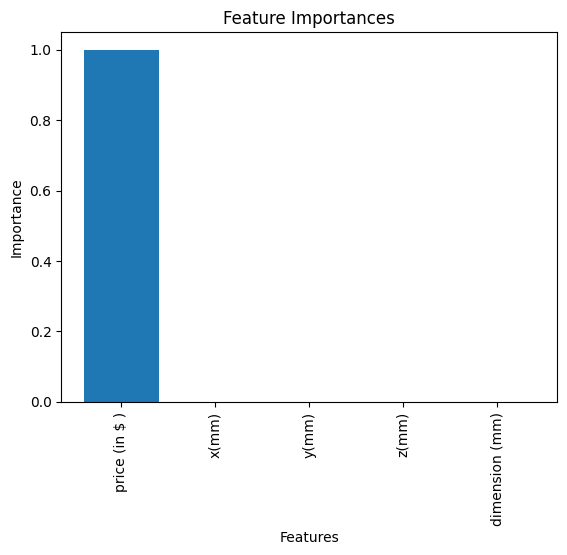

In [129]:
# Optionally, you can visualize the feature importances using a bar plot
plt.bar(range(len(reg.coef_)), reg.coef_)
plt.xticks(range(len(reg.coef_)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

##The intercept value, often denoted as "b" or "intercept," represents the value of the dependent variable (y) when all independent variables (x) are zero. In linear regression, the intercept term is the value at which the regression line crosses the y-axis.
The intercept term captures the constant component of the relationship between y and x. It represents the expected value of y when all independent variables are zero.
intercept_ attribute provides the intercept value of the fitted linear regression model. It represents the estimated value of the dependent variable when all independent variables are zero.
##the value of -4.263256414560601e-14 is in scientific notation and represents a very small number close to zero. Specifically, it is equal to -0.00000000000004263256414560601.

In [145]:
print("Bias: ", reg.intercept_)   

Bias:  -4.263256414560601e-14


In [44]:
predicted_price = reg.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:", predicted_price)

Predicted price: [92.5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
# new 3D model values
new_values = [[123.5,1041140.613,123.5, 218.4,100.613]]

# Making predictions on new 3D model values
price_prediction = reg.predict(new_values)

# Displaying the predicted price
print("Predicted price:", price_prediction)

Predicted price: [123.5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [196]:
# Use cross-validation to evaluate the model
scores = cross_val_score(reg, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Score: 1.0


##**Ridge regression model**

In [198]:
#Create and train the Ridge regression model
ridge = Ridge(alpha=1)  # Regularization parameter (higher values increase the penalty)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [199]:
## Predict on the test set
y_pred = ridge.predict(X_test)
y_pred

array([ 31.4300003 ,   4.59999577, 823.15976931,  14.59000551,
        22.38001688, 514.16994879,  88.04004702, 329.50007586,
        56.72000998,  58.73999478,   7.19999985, 185.8499219 ,
        74.42000652, 149.89996053,  31.33001239,  38.8300039 ,
       464.26990596,  38.23005841,  43.32000713,  72.46001341,
         5.31000032,   8.65000121,  69.91001775,  11.37000006,
        11.18000216,  70.83004699,  91.37001376,  54.27000738,
         8.05000127,   8.45002378, 276.47986443,  26.43997242,
       188.89088599,  44.4599515 ,  26.41000385,  18.31000193,
        19.81000425,  21.87000258, 270.66998944,  27.22998668,
         4.00999944,  21.120004  ,  62.12005166, 127.10001894])

In [200]:
# test the model
print("\nRidge Regression:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = ridge.score(X_test, y_test)
print("R-squared:", r_squared)


Ridge Regression:
MSE: 2.040477658440496e-08
RMSE: 0.00014284528898218855
R^2 score: 0.9999999999992011
R-squared: 0.9999999999992011


In [201]:
print("Learned coefficients: ", ridge.coef_)
# Get the feature names
feature_names = df.columns.tolist()  # Assuming the column names represent the feature names

# Print the feature names along with the corresponding coefficients
for feature, coef in zip(feature_names, ridge.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")

Learned coefficients:  [ 9.99999464e-01 -1.44280351e-07  3.55005882e-07  6.78023693e-07
  3.47310410e-11]
Feature: name, Coefficient: 0.9999994638992781
Feature: price (in $ ), Coefficient: -1.4428035145629368e-07
Feature: x(mm), Coefficient: 3.5500588231048617e-07
Feature: y(mm), Coefficient: 6.780236931855707e-07
Feature: z(mm), Coefficient: 3.47310410054908e-11


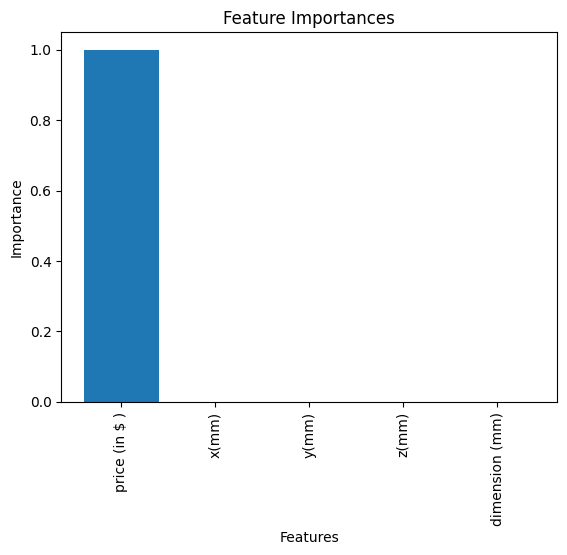

In [202]:
# Optionally, you can visualize the feature importances using a bar plot
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.xticks(range(len(ridge.coef_)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [203]:
print("Bias: ",ridge.intercept_)

Bias:  -1.1559264834204441e-06


##**The value of -1.1559264834204441e-06 is in scientific notation and represents a very small number close to zero. Specifically, it is equal to 
-0.0000011559264834204441.

In the context of machine learning, this value is often associated with the bias term or the intercept in a model. The bias term represents the constant term in a model equation and is added to the weighted sum of the input features to make predictions.

In this case, the bias value of -1.1559264834204441e-06 suggests that the model's predictions are adjusted by a very small negative value. It indicates that when all the input features are zero or have a minimal impact on the predictions, the model's predictions will be slightly shifted downwards by this bias value**

In [204]:
predicted_price = ridge.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:", predicted_price)

Predicted price: [92.49998993]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [205]:
# new 3D model values
new_values = [[123.5,1041140.613,123.5, 218.4,100.613]]

# Making predictions on new 3D model values
price_prediction = ridge.predict(new_values)

# Displaying the predicted price
print("Predicted price:", price_prediction)

Predicted price: [123.34990843]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [206]:
# Use cross-validation to evaluate the model
scores = cross_val_score(reg, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Score: 1.0


##Lasso regression mode

In [207]:
# Fit the Lasso regression model to the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [208]:
# Use the model to make predictions on the test data
y_pred = lasso.predict(X_test)

In [209]:
y_pred

array([ 31.43003821,   4.60013272, 823.15787981,  14.59009399,
        22.38009072, 514.16923788,  88.04014334, 329.50041847,
        56.71996578,  58.74004084,   7.20012159, 185.84946756,
        74.41995765, 149.89967495,  31.3300479 ,  38.83004355,
       464.26890629,  38.23029774,  43.31997711,  72.459972  ,
         5.31012972,   8.65011545,  69.90994358,  11.37010475,
        11.18010458,  70.83022871,  91.36991264,  54.26995527,
         8.05011791,   8.45013674, 276.47903395,  26.44004076,
       188.89909902,  44.4599726 ,  26.41004219,  18.3100744 ,
        19.81007168,  21.87006092, 270.66948714,  27.23004282,
         4.01013536,  21.12006313,  62.12006927, 127.09986304])

In [210]:
# test the model
print("\nlasso Regression:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = ridge.score(X_test, y_test)
print("R-squared:", r_squared)


lasso Regression:
MSE: 2.0729825036836285e-06
RMSE: 0.0014397855755922922
R^2 score: 0.999999999918832
R-squared: 0.9999999999992011


In [211]:
print("Learned coefficients: ", lasso.coef_)

# Get the feature names
feature_names = df.columns.tolist()  # Assuming the column names represent the feature names

# Print the feature names along with the corresponding coefficients
for feature, coef in zip(feature_names, lasso.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")

Learned coefficients:  [9.99995563e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.14104708e-10]
Feature: name, Coefficient: 0.9999955625534104
Feature: price (in $ ), Coefficient: 0.0
Feature: x(mm), Coefficient: 0.0
Feature: y(mm), Coefficient: 0.0
Feature: z(mm), Coefficient: 4.1410470810368993e-10


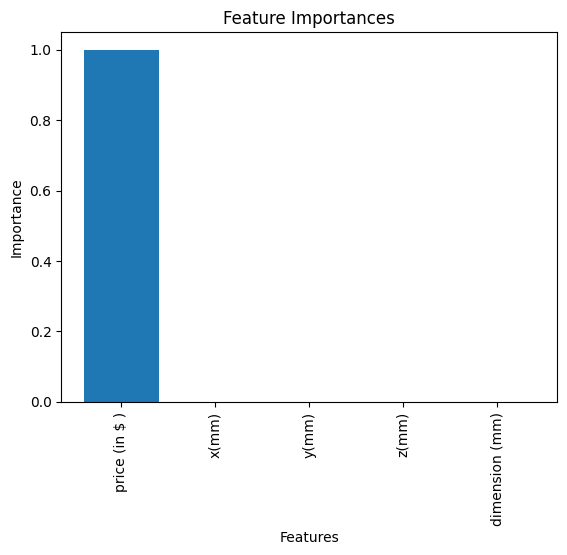

In [212]:
# Optionally, you can visualize the feature importances using a bar plot
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xticks(range(len(lasso.coef_)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

##The value of 0.0001531164784722705

In [213]:
print("Bias: ",lasso.intercept_)

Bias:  0.0001531164784722705


In [214]:
predicted_price = lasso.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:", predicted_price)

Predicted price: [92.49974267]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [215]:
# new 3D model values
new_values = [[123.5,1041140.613,123.5, 218.4,100.613]]

# Making predictions on new 3D model values
price_prediction = lasso.predict(new_values)

# Displaying the predicted price
print("Predicted price:", price_prediction)

Predicted price: [123.49960513]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [216]:
# Use cross-validation to evaluate the model
scores = cross_val_score(reg, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Score: 1.0


##**decision tree regression** 

In [33]:
# Fit the decision tree regression model to the training data
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Use the model to make predictions on the test data
y_pred = tree.predict(X_test)
y_pred

array([ 31.43,   4.72, 659.2 ,  14.55,  22.28, 317.67,  89.74, 317.67,
        56.47,  62.92,   8.05, 178.78,  72.65, 153.24,  31.35,  38.93,
       317.67,  38.47,  43.97,  72.65,   5.01,   8.83,  71.82,  11.22,
        11.21,  68.85,  81.31,  53.98,   8.05,   9.22, 292.48,  26.75,
       193.  ,  43.22,  26.75,  17.43,  19.72,  22.28, 292.48,  27.08,
         4.16,  21.07,  60.34, 127.82])

In [37]:
# test the model
print("\n decision tree:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = tree.score(X_test, y_test)
print("R-squared:", r_squared)


 decision tree:
MSE: 2001.7547999999988
RMSE: 44.740974508832494
R^2 score: 0.9216209360512831
R-squared: 0.9216209360512831


In [38]:
try:
      importances=tree.feature_importances_
      print("Learned coefficients: ", importances)
except AttributeError:
      print("Decision Tree regressor does not have 'coef_' attribute")


Learned coefficients:  [9.90742702e-01 4.60254682e-05 1.65913928e-04 8.63827969e-03
 4.07079292e-04]


In [39]:
# Print the importance scores for each feature
importances=tree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

price (in $ ): 0.9907427016262493
x(mm): 4.602546823280242e-05
y(mm): 0.00016591392763475735
z(mm): 0.008638279685860992
dimension (mm): 0.000407079292022038


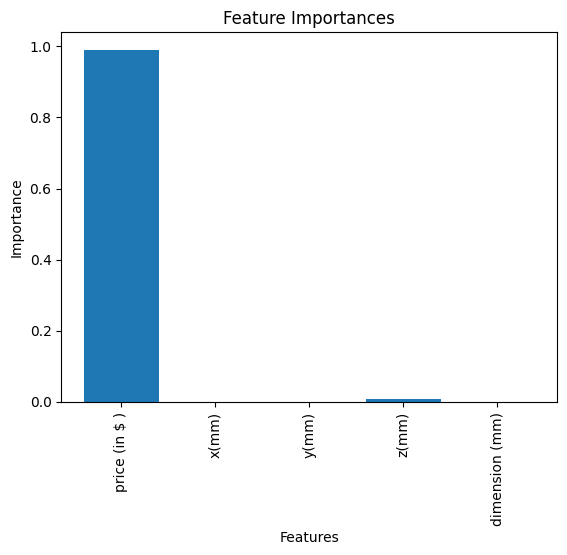

In [41]:
# Optionally, you can visualize the feature importances using a bar plot
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

##calculate the bias of decision tree

In [42]:
# Calculate the mean of the target variable in the training data
y_train_mean = np.mean(y_train)
# Calculate the intercept value
intercept = y_train_mean - np.dot(tree.feature_importances_, np.mean(X_train, axis=0))

print("bias:", intercept)

bias: -231.14793535636346


In [43]:
predicted_price = tree.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:",predicted_price)

Predicted price: [83.95]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [45]:
# new 3D model values
new_values = [[123.5,1041140.613,123.5, 218.4,100.613]]

# Making predictions on new 3D model values
price_prediction = tree.predict(new_values)

# Displaying the predicted price
print("Predicted price:", price_prediction)

Predicted price: [126.03]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
# Use cross-validation to evaluate the model
scores = cross_val_score(tree, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [0.79840434 0.95673778 0.98587596 0.60138151 0.73391035]
Average Score: 0.8152619874305618


##Random forest

In [47]:
# Fit the random forest regression model to the training data
forest =RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [48]:
# Use the model to make predictions on the test data
y_pred = forest.predict(X_test)
y_pred

array([ 31.6468,   4.6456, 678.5023,  14.4319,  22.7842, 445.4167,
        91.6016, 401.5136,  55.1782,  59.6628,   7.5916, 176.6156,
        70.4306, 153.2842,  31.7094,  38.4341, 355.9563,  44.3567,
        43.7861,  70.9373,   5.2028,   8.6538,  70.0808,  11.2359,
        11.1678,  86.3427,  90.8262,  54.2279,   8.0823,   8.6666,
       274.6344,  26.7869, 494.5485,  44.6585,  26.6796,  18.1304,
        19.8217,  22.1403, 293.0553,  27.2516,   4.2118,  20.5048,
        63.1181, 126.3331])

In [50]:
print("random forest:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = forest.score(X_test, y_test)
print("R-squared:", r_squared)

random forest:
MSE: 3111.704975324545
RMSE: 55.78265837448539
R^2 score: 0.8781606402290114
R-squared: 0.8781606402290114


In [51]:
# Print the importance scores for each feature
importances=forest.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

price (in $ ): 0.6880343536407949
x(mm): 0.008890952961154587
y(mm): 0.046758931094736694
z(mm): 0.1353829619916938
dimension (mm): 0.12093280031161986


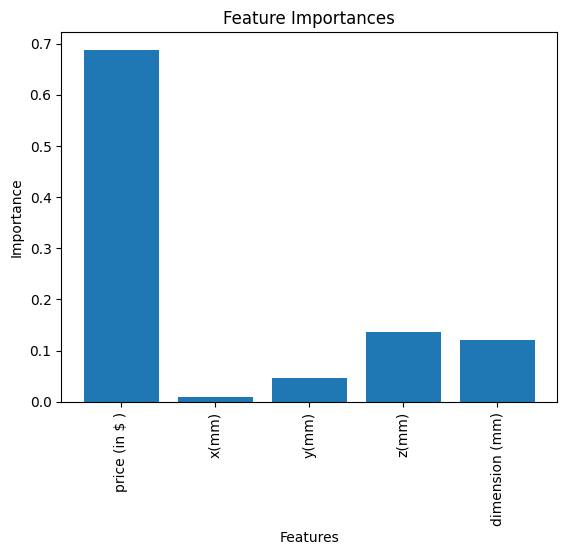

In [52]:
# Optionally, you can visualize the feature importances using a bar plot
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [54]:
# Calculate the mean of the target variable in the training data
y_train_mean = np.mean(y_train)
# Calculate the intercept value
intercept = y_train_mean - np.dot(forest.feature_importances_, np.mean(X_train, axis=0))

print("bias:", intercept)

bias: -68802.28754851125


In [55]:
predicted_price = forest.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:",predicted_price)

Predicted price: [91.0498]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [56]:
# Use cross-validation to evaluate the model
scores = cross_val_score(forest, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [0.63323674 0.98455143 0.99220335 0.52684026 0.94756246]
Average Score: 0.8168788494788956


##**support vector regression **

In [74]:
# Fit the support vector regression model to the training data
svr = SVR(kernel='rbf', C=100, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.2)

In [75]:
# Use the model to make predictions on the test data
y_pred = svr.predict(X_test)
y_pred

array([ 27.87408677,  17.92488727, 123.96734619,  20.15823201,
        33.01446193, 125.50309253, 174.76092634, 104.0480792 ,
        44.71165219,  81.87958768,  18.08462876,  77.75136978,
        75.79983253,  99.0440181 ,  31.71577318,  44.01275959,
       212.68838513, 151.68545067,  24.45248213,  78.32604236,
        17.98283055,  18.20491524,  60.62599061,  18.74766377,
        18.34508343, 177.56492861,  89.27865385,  35.56999613,
        18.12115164,  26.45606513,  63.73466143,  19.9006483 ,
       202.39824405,  24.67414529,  20.42047743,  18.92544076,
        20.50034283,  19.85387034, 210.86478109,  22.13997636,
        17.93414085,  19.4052688 , 101.15945675, 135.97848768])

In [76]:
print("SVR:")
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

r_squared = forest.score(X_test, y_test)
print("R-squared:", r_squared)

SVR:
MSE: 19413.784877804774
RMSE: 139.33335881189677
R^2 score: 0.23984981256241045
R-squared: 0.8781606402290114


In [77]:
try:
    print("Learned coefficients: ", svr.feature_importance_)
except AttributeError:
    print("svr does not have 'coef_' attribute")     

svr does not have 'coef_' attribute


In [78]:
print("Bias of SVR: ", svr.intercept_)

Bias of SVR:  [202.39824405]


In [79]:
# Use the model to make a prediction on new data
predicted_price = svr.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:", predicted_price)

Predicted price: [17.92508194]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [80]:
# new 3D model values
new_values = [[123.5,1041140.613,123.5, 218.4,100.613]]

# Making predictions on new 3D model values
price_prediction = svr.predict(new_values)

# Displaying the predicted price
print("Predicted price:", price_prediction)

Predicted price: [69.81427296]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [81]:
# Use cross-validation to evaluate the model
scores = cross_val_score(forest, X_test, y_test, cv=5) # Perform 5-fold cross-validation
# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [0.63323674 0.98455143 0.99220335 0.52684026 0.94756246]
Average Score: 0.8168788494788956
